# Microstructure Maps -- The CellData Group

The main focus of the *Pymicro* package is to provide tools to study the *microstructure-properties* relationship for polycrystalline materials. This work naturally involves working from a description of the microstructure of the studied material samples. These descriptions are generally microstructural images, that can be:

* outputs of real imaging experiments (DCT, CT, EBSD ...)
* digitally generated microstructure images (Voronoi tesselations, outputs from softwares like Neper, DREAM3D ...)
* outputs of numerical simulations techniques that provide images (such as FFT-based solvers)

They can be bi-dimensional or tri-dimensional, and usually are maps of the material phases or crystal orientation. This tutorial will review how to store, load and process microstructure images of a material with *Pymicro* and the `Microstructure` class.

The *data model* of [the Microstructure class](./Microstructure_class.ipynb) includes a specific *Group* to store microstructure images, the `CellData` group. 

## The CellData Group

The `CellData` group is an *Image Group* (see [dedicated tutorial](./Image_data.ipynb)), *i.e.* a group designed to store several images of the same dimension. The `CellData` group aim is to store on the same grid images of the studied microstructure from various modalities (for instance, EBSD and SEM images), to allow for simultaneous visualization and cross processing of these data. 

Note that you can directly benefit from 3D visualization of the `CellData` group content by using the Paraview software: an XDMF file for your dataset is automatically generated if you close your microstructure, that you can directly open it with the Paraview software. Alternatively, you can use the `pause_for_visualization` method to do it from your interactive Python interpreter. More details on these functionalities, please refer to this [tutorial](./Get_Datasets_Information.ipynb).

One of Pymicro's example datasets will be used to illustrate the `CellData` content, let's start by opening it with the `Microstructure` class and display the content of this group:

In [1]:
from config import PYMICRO_EXAMPLES_DATA_DIR # import file directory path
import os 

# import Microstructure class
from pymicro.crystal.microstructure import Microstructure 
micro = Microstructure(filename=os.path.join(PYMICRO_EXAMPLES_DATA_DIR,'t5_dct_slice_data.h5'))

# display CellData group content
micro.print_node_info('CellData')
micro.print_group_content('CellData', short=True)


 GROUP CellData
 -- Parent Group : /
 -- Group attributes : 
	 * active_grain_map : grain_map
	 * active_phase_map : phase_map
	 * description :  
	 * dimension : (654, 654, 1)
	 * empty : False
	 * group_type : 3DImage
	 * nodes_dimension : [655 655   2]
	 * origin : [0. 0. 0.]
	 * spacing : [0.0014 0.0014 0.0014]
	 * xdmf_geometry_path : Domain/Grid/Geometry
	 * xdmf_path : Domain/Grid
	 * xdmf_topology_path : Domain/Grid/Topology
 -- Childrens : grain_map, mask, phase_map, 
----------------

     --NODE grain_map: /CellData/grain_map (None) (   15.072 Kb)
     --NODE mask: /CellData/mask (None) (    4.714 Kb)
     --NODE phase_map: /CellData/phase_map (None - empty) (   64.000 Kb)



Let us now open the dataset and display the content of the group, using the `Microstructure` class:

This dataset `CellData` group contains a 3D image of $654x654x1$ voxels, with a resolution of $0.0014$ mm, that has 3 fields: `grain_map`, `mask` and`phase_map`. The microstructure image is actually a 3D image. It is stored as a 3D image as the dataset has been created by extracting a slice of a 3D microstructure dataset. 

These three fields are part of the standard *data model* of the `Microstructure` datasets:

* `mask`: a field describing the geometry of the sample. It has a 1 value inside the sample, and a 0 value outside the sample (typically, segmented X-ray Contrast Tomography outputs can be used as Microstructure mask). 
* `phase_map`: a field indicating for each pixel/voxel the ID of the phase in which it is located. In areas of the Image that are not part of the material sample, the *grain_map* field takes a zero or negative value.
* `grain_map`: a field indicating for each pixel/voxel the ID of the grain in which it is located. In areas of the Image that are not part of the material sample, the *grain_map* field takes a zero or negative value.

The `phase_map` is empty here. The microstructure only has 1 phase, so this field is not usefull for this dataset.

<div class="alert alert-info">

**Note** 
    
The length unit for *Pymicro* `CellData` image is millimeters (mm).

</div>

The `grain_map`, `mask` and`phase_map` arrays are essential for the `Microstructure`: a wide range of data processing methods can be applied to these arrays, or rely on their values. For instance, they are used to compute statistics of the grains morphology, provide various visualizations of the microstructure, merge two different microstructures into one dataset, create inputs for simulation softwares... Many examples can be found in the documentation tutorials, Cookbook and Examples.

### Get CellData array values

To retrieve these arrays, you can used dedicated methods of the `Microstructure` class...

In [2]:
# import Numpy to process arrays
import numpy as np

# get arrays in CellData group
mask = micro.get_mask()
phase_map = micro.get_phase_map()
grain_map = micro.get_grain_map()

print(f'List of values in the mask:\n {np.unique(mask)}\n')
print(f'List of values in the phase map:\n {np.unique(phase_map)}\n')
print(f'List of values in the grain map:\n {np.unique(grain_map)}\n')

print(f'Number of grains in the grain map: {len(np.unique(grain_map))}')

List of values in the mask:
 [0 1]

List of values in the phase map:
 [None]

List of values in the grain map:
 [  0   1   3   5   6   7   9  10  14  16  17  18  22  25  32  37  40  51
  52  98 115 124]

Number of grains in the grain map: 22


...or using the features of the `SampleData` class ([see dedicated tutorial](./Data_Items.ipynb)) to retrieve data:

In [3]:
# attribute like access
mask2 = micro.mask
print(f'Attribute like access test : {np.all(mask2 == mask)}')

# dictionary like access
grain_map2 = micro['grain_map']
print(f'Dictionary like access test : {np.all(grain_map2 == grain_map)}')

Attribute like access test : True
Dictionary like access test : True


### Visualization : View Slice method

The `Microstructure` class provides the `view_slice` method to plot a slice of the microstructure (the whole image if it is a 2D microstructure) using the `grain_map` and `mask` arrays:

using slice value 0
using slice value 0


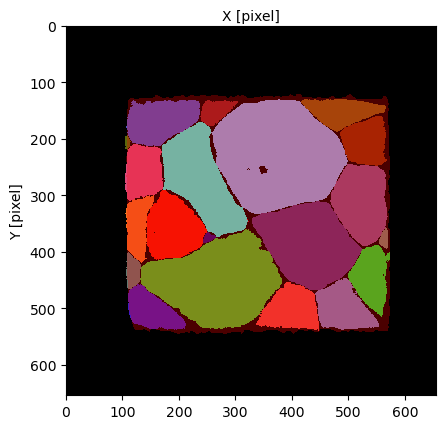

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [4]:
micro.view_slice()

When no optional argument is provided, the method plots the middle $(X,Y)$-wise slice of the sample grain map, with a random color map for the grain ids, and shows the mask in red on the foreground in transparency mode. The image reveals colored areas that indicate the different grains in the material sample? The mask (in red) reveals the geometry of the sample associated to the dataset. 

The optional arguments of the method are:

* `plane`: the plane along which the slice is cut, must be one of 'XY', 'YZ' or 'XZ'
* `slice`: the slice index in the arrays of the `CellData` group. 'YZ' and `slice=10` would plot `CellDataField[10,:,:]`
* `color`: a string to chose the colormap from (`random`, `grain_ids`, `schmid`: Schmid factors, `ipf`: Inverse pole figure)
* `show_mask`: a flag to show the mask by transparency.
* `show_grain_ids`: a flag to annotate the plot with the grain ids.
* `highlight_ids`: a list of grain ids to restrict the annotations (by default all grains are annotated).
* `slip_system`: an instance (or a list of instances) of the class SlipSystem to compute the Schmid factor.
* `axis`: the unit vector for the load direction to compute the Schmid factor or to display IPF coloring. 
* `show_slip_traces`: activate slip traces plot in each grain.
* `hkl_planes`: the list of planes to plot the slip traces.
* `unit`: switch between mm and pixel units.
* `show_gb`: show the grain boundaries, works only with color='ipf' for now.
* `display`: if True, the show method is called, otherwise, the figure is simply returned.

Let's some more advanced examples of the visualization possibilities:

using slice value 0
using slice value 0


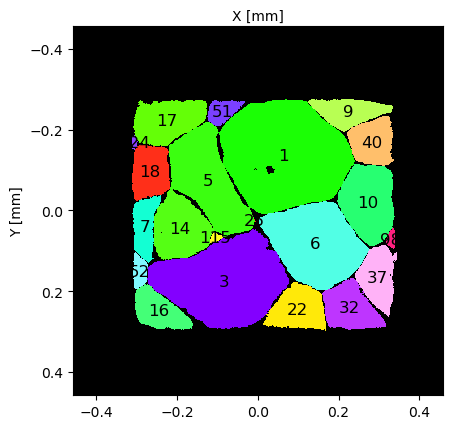

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [mm]', ylabel='Y [mm]'>)

In [5]:
# plot Inverse pole figure map of the microstructure and show grain ids + set scale to millimeters
micro.view_slice(show_mask=False, show_grain_ids=True, color='ipf', unit='mm')

using slice value 0
using slice value 0


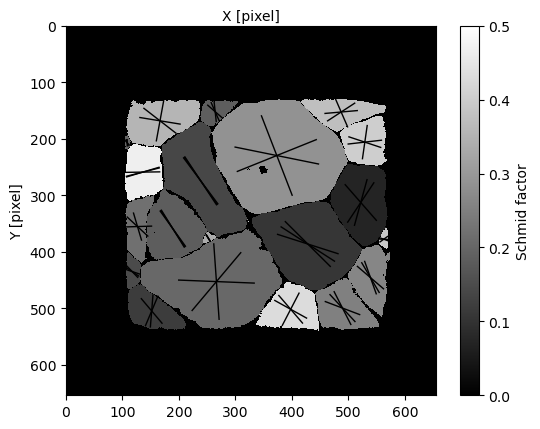

using slice value 0
using slice value 0


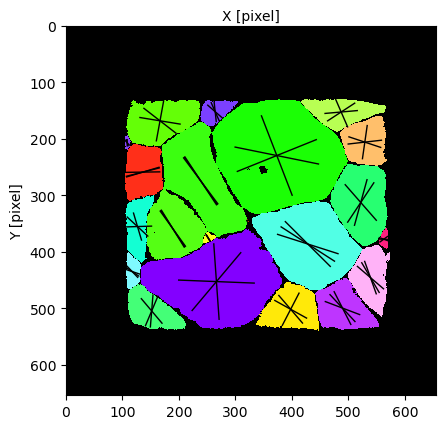

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [6]:
# plot Schmid factor map of first basal slip system and show traces of all prismatic slip systems
#=============================================================================================
# get one basal slip system to compute its schmid factors and plot them on the slice
from pymicro.crystal.lattice import SlipSystem
lattice = micro.get_phase().get_lattice()
slip_system = lattice.get_slip_systems('basal')[1]

# get basal slip planes
plane_list = [] 
slip_system = lattice.get_slip_systems('prism')[0]
plane_list.append(slip_system.get_slip_plane())
slip_system = lattice.get_slip_systems('prism')[1]
plane_list.append(slip_system.get_slip_plane())
slip_system = lattice.get_slip_systems('prism')[2]
plane_list.append(slip_system.get_slip_plane())

# plot slice with schmid factor colormap
# set display to True to try reproducing the figure below !
micro.view_slice(color='schmid', slip_system=slip_system, show_mask=False, show_slip_traces=True, hkl_planes=plane_list)


# plot same slice with IPF colormap to better visualize slip traces
micro.view_slice(color='ipf', slip_system=slip_system, show_mask=False, show_slip_traces=True, hkl_planes=plane_list)

In [7]:
del micro

### Active Maps

In some situations, it may be relevant, to store several arrays for the same microstructural map. For instance, when reconstructing a microstructure from an imaging experiment, the raw imaging output is an important data item to store, but may be improved with some image processing. As a result, the dataset may contain more than one array that could be used as a `grain_map` or a `phase_map`.

The `Microstructure` class uses two attributes, `active_grain_map` and `active_phase_map`, to specify which array is to be used as the main `grain_map` or a `phase_map` for data processing. In practice, `active_grain_map` and `active_grain_map` are *strings* that indicated the name of the array to use, and:

* the `get_grain_map` and `get_phase_map` return the `active_grain_map` and `active_grain_map` arrays.
* `Microstructure` methods will use the `active_grain_map` and `active_grain_map` as `grain_map` or a `phase_map`. This will impact for instance the `view_slice` method presented above.

The dataset `example_microstructure` in `Pymicro/examples` contains several grain_maps. We will use it to illustrate how to use active maps.

In [8]:
# Open dataset 
#=============
dataset_file = os.path.join(PYMICRO_EXAMPLES_DATA_DIR, 'example_microstructure') # test dataset desired file path
tar_file = os.path.join(PYMICRO_EXAMPLES_DATA_DIR, 'example_microstructure.tar.gz') # dataset zipped archive path

# Save current directory
cwd = os.getcwd()
# move to example data directory
os.chdir(PYMICRO_EXAMPLES_DATA_DIR)
# unarchive the dataset
os.system(f'tar -xvf {tar_file}')
# get back to UserGuide directory
os.chdir(cwd)

# Open Microstructure dataset
micro = Microstructure(filename=dataset_file)

# print content of CellData group
micro.print_group_content('CellData', short=True)

example_microstructure.h5
example_microstructure.xdmf
    |--GROUP Amitex_output_fields: /CellData/Amitex_output_fields (Group) 
     --NODE Field_index: /CellData/Field_index (string_array) (   63.999 Kb)
     --NODE grain_map: /CellData/grain_map (field_array) (    1.945 Mb)
     --NODE grain_map_raw: /CellData/grain_map_raw (field_array) (    1.945 Mb)
     --NODE mask: /CellData/mask (field_array) (  996.094 Kb)
     --NODE phase_map: /CellData/phase_map (field_array - empty) (   64.000 Kb)
     --NODE uncertainty_map: /CellData/uncertainty_map (field_array) (  996.094 Kb)



This dataset has been built from a synchrotron X-ray diffraction experiment, and store the processed and raw version of the reconstructed microstructure in the `grain_map` and `grain_map_raw` data items. The active grain map can be known from the class attribute:

In [9]:
print(f'The active grain map is "{micro.active_grain_map}"')

The active grain map is "grain_map"


To set the value of the active grain map, you can use `set_active_grain_map` method: 

In [10]:
# get both grain maps arrays
grain_map = micro['grain_map']
grain_map_raw = micro['grain_map_raw']

# check class method return grain map
print(f'The active grain map is "{micro.active_grain_map}"')
print(f'Is the active grain map equal to "grain_map" array ? {np.all(grain_map == micro.get_grain_map())}')
print(f'Is the active grain map equal to "grain_map_raw" array ? {np.all(grain_map_raw == micro.get_grain_map())}\n')

# change grain map and redo the test
micro.set_active_grain_map('grain_map_raw')
print(f'The active grain map is "{micro.active_grain_map}"')
print(f'Is the active grain map equal to "grain_map" array ? {np.all(grain_map == micro.get_grain_map())}')
print(f'Is the active grain map equal to "grain_map_raw" array ? {np.all(grain_map_raw == micro.get_grain_map())}')


The active grain map is "grain_map"
Is the active grain map equal to "grain_map" array ? True
Is the active grain map equal to "grain_map_raw" array ? False

The active grain map is "grain_map_raw"
Is the active grain map equal to "grain_map" array ? False
Is the active grain map equal to "grain_map_raw" array ? True


As shown above, the `get_grain_map` method return the array that is named after the string stored in the `active_grain_map` attribute of the `Microstructure` class instance. For further illustration, we will see how it impacts visualization with the `view_slice` method:

The active grain map is "grain_map"
using slice value 50
using slice value 50


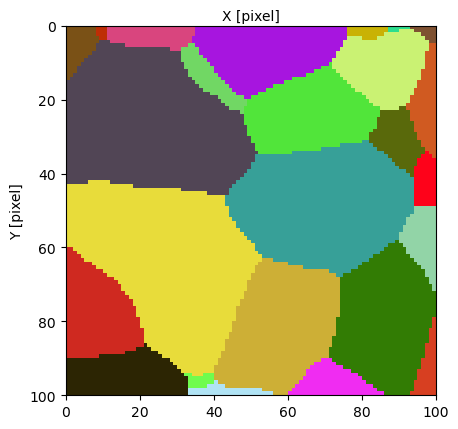

The active grain map is "grain_map_raw"
using slice value 50
using slice value 50


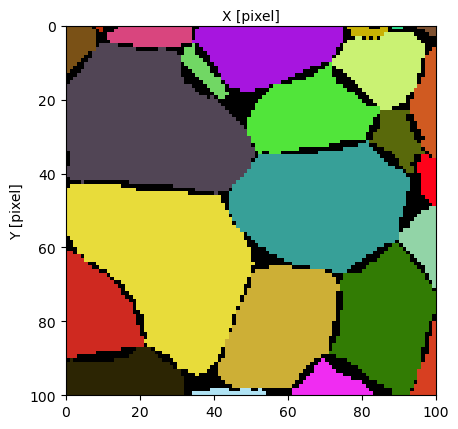

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [11]:
# set active grain map and visualize
micro.set_active_grain_map('grain_map')
print(f'The active grain map is "{micro.active_grain_map}"')
micro.view_slice()

# set active grain map and visualize
micro.set_active_grain_map('grain_map_raw')
print(f'The active grain map is "{micro.active_grain_map}"')
micro.view_slice()

The `grain_map_raw` field is very similar to the `grain_map` field but contains empty regions around grain boundaries, that come from uncertainties in the microstructure reconstruction process from X-ray diffraction experiments. Several image processing steps have enable to fill these gaps and create a *grain map* with no empty regions, that can be used, for instance, as an input for numerical simulations. 

<div class="alert alert-info">

**Note** 
    
Note that the same mechanism allows to handle several the phase map fields, with the `active_phase_map` class attribute and `set_active_phase_map` method.


</div>

## Add microstructure maps in datasets

To conclude this tutorial, we will see how to add data into the `CellData` group of a dataset. To set the values of the `grain_map`, `mask` and`phase_map`, you may use the `set_mask` , `set_grain_map` and `set_phase_map` methods of the `Microstructure` class:

0 phases found in the data set
new phase added: unknown
CellData group at dataset creation:

 GROUP CellData
 -- Parent Group : /
 -- Group attributes : 
	 * active_grain_map : grain_map
	 * active_phase_map : phase_map
	 * empty : True
	 * group_type : emptyImage
 -- Childrens : grain_map, Field_index, phase_map, mask, 
----------------


CellData group after setting grain map:

 GROUP CellData
 -- Parent Group : /
 -- Group attributes : 
	 * active_grain_map : grain_map
	 * active_phase_map : phase_map
	 * description :  
	 * dimension : [100 100 100]
	 * empty : False
	 * group_type : 3DImage
	 * nodes_dimension : [101 101 101]
	 * nodes_dimension_xdmf : [101 101 101]
	 * origin : [0. 0. 0.]
	 * spacing : [0.00122 0.00122 0.00122]
	 * xdmf_gridname : CellData
 -- Childrens : Field_index, phase_map, mask, grain_map, 
----------------

using slice value 50
Microstructure instance must have a mask field to view it with "view_slice"
Could not get mask slice, proceeding... 


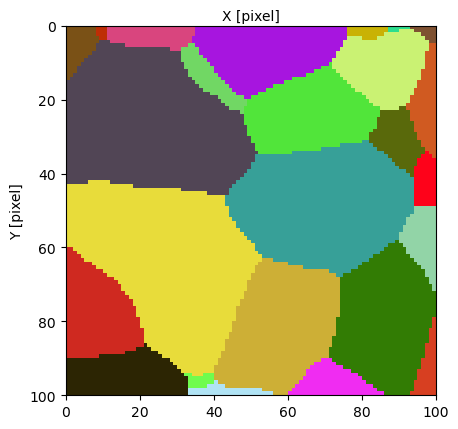

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [12]:
# create an empty Microstructure object
micro2 = Microstructure(filename='micro_test', autodelete=True)
# print content of phase data group
print('CellData group at dataset creation:')
micro2.print_node_info('CellData')

# get grain map from example dataset 
micro.set_active_grain_map('grain_map')
grain_map = micro.get_grain_map()

# set grain map in new microstructure
micro2.set_grain_map(grain_map, voxel_size=micro.get_attribute('spacing','CellData')[0])

# print content of phase data group and visualize
print('CellData group after setting grain map:')
micro2.print_node_info('CellData')
micro2.view_slice()

The `CellData` group is created empty in a new dataset. For this reason, the `set_grain_map` method requires that the user provides a voxel/pixel size for the image when adding the first microstructural map in the dataset. 

The `set_grain_map` method can also be used to add a second grain map field, by using the `map_name` input argument. Its defaults value, `"grain_map"`, leads to overwriting the current `grain_map` array stored in the dataset. Using a different value allows to create a new array in the `CellData` group, and automatically sets it as active grain map: 

The active grain map is "grain_map_raw"
using slice value 50
Microstructure instance must have a mask field to view it with "view_slice"
Could not get mask slice, proceeding... 


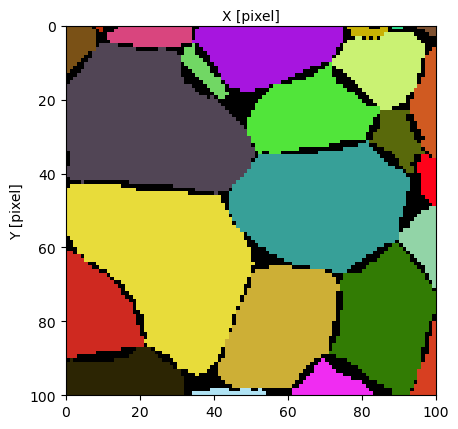

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [13]:
# use set_grain_map to add raw grain map
micro2.set_grain_map(grain_map=micro['grain_map_raw'], map_name='grain_map_raw')
print(f'The active grain map is "{micro2.active_grain_map}"')
micro2.view_slice()

As an *Image Group*, you can also add fields to the `CellData` group with the *SampleData* method `add_field`:

CellData group after adding a second grain map raw array:

 GROUP CellData
 -- Parent Group : /
 -- Group attributes : 
	 * active_grain_map : grain_map_raw
	 * active_phase_map : phase_map
	 * description :  
	 * dimension : [100 100 100]
	 * empty : False
	 * group_type : 3DImage
	 * nodes_dimension : [101 101 101]
	 * nodes_dimension_xdmf : [101 101 101]
	 * origin : [0. 0. 0.]
	 * spacing : [0.00122 0.00122 0.00122]
	 * xdmf_gridname : CellData
 -- Childrens : Field_index, phase_map, mask, grain_map, grain_map_raw, grain_map_raw_2, 
----------------

using slice value 50
Microstructure instance must have a mask field to view it with "view_slice"
Could not get mask slice, proceeding... 


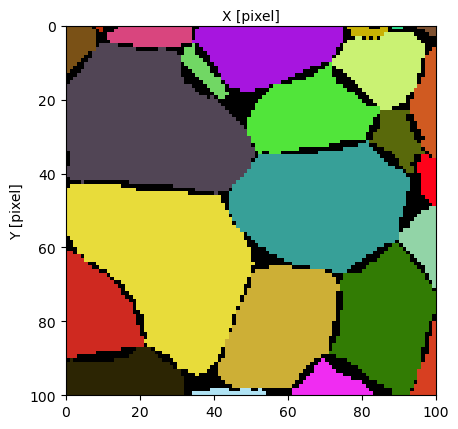

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [14]:
# add grain map raw into new microstructure 
grain_map_raw = micro['grain_map_raw']
micro2.add_field(gridname='CellData', fieldname='grain_map_raw_2', array=grain_map_raw)

# print content of phase data group and visualize
print('CellData group after adding a second grain map raw array:')
micro2.print_node_info('CellData')
micro2.set_active_grain_map('grain_map_raw_2')
micro2.view_slice()

<div class="alert alert-info">

**Note** 
    
Set the `mask` and `phase_map` field values in the same way as with the `grain_map` field, using the `set_mask` and `set_phase_map` methods.


</div>

This concludes the tutorial on Pymicro's microstructural maps.

In [15]:
del micro2
del micro
os.remove(dataset_file+'.h5')
os.remove(dataset_file+'.xdmf')

Microstructure Autodelete: 
 Removing hdf5 file micro_test.h5
